In [1]:
import pandas as pd #pandas is a library for data manipulation and analysis
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [3]:
X = df[['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront', 'view', 'grade', 'yr_built']]
y = df['price']

In [4]:
X

,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,yr_built
0,3,1.00,1180,1.0,0,0,7,1955
1,3,2.25,2570,2.0,0,0,7,1951
2,2,1.00,770,1.0,0,0,6,1933
3,4,3.00,1960,1.0,0,0,7,1965
4,3,2.00,1680,1.0,0,0,8,1987
...,...,...,...,...,...,...,...,...
21608,3,2.50,1530,3.0,0,0,8,2009
21609,4,2.50,2310,2.0,0,0,8,2014
21610,2,0.75,1020,2.0,0,0,7,2009
21611,3,2.50,1600,2.0,0,0,8,2004


In [5]:
y

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64

In [6]:
from sklearn.model_selection import train_test_split 


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 
# test size ka matlab 20% of data   
# random state is used to get the same result every time we run the code

TRAINING THE MODEL

In [8]:
from sklearn.linear_model import LinearRegression


regressor = LinearRegression()
regressor.fit(X_train, y_train) #regressor.fit is used to train the model on the training data

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


PREDICTING THE RESULT

In [9]:
Y_pred = regressor.predict(X_test)

In [10]:
sample = [[3, 2, 2000, 1, 0, 0, 7, 1990]]
print(regressor.predict(sample))   

[355245.30819219]


C:\Users\saumy\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [11]:
print(regressor.predict([[3, 2, 2000, 1, 0, 0, 7, 1990]]))

[355245.30819219]


C:\Users\saumy\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [12]:
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': Y_pred})
print(comparison.head(10))

          Actual     Predicted
17384   297000.0  2.853850e+05
722    1578000.0  1.481298e+06
2680    562100.0  5.237157e+05
18754   631500.0  5.561988e+05
14554   780000.0  8.605866e+05
16227   485000.0  2.946474e+05
6631    340000.0  4.638336e+05
19813   335606.0  5.313398e+05
3367    425000.0  6.431722e+05
21372   490000.0  1.189316e+06


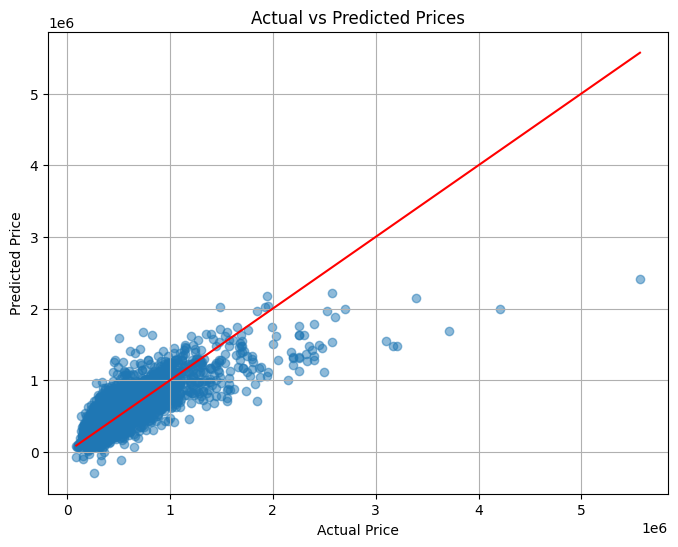

In [13]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, Y_pred, alpha=0.5)
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.grid(True)
plt.show()

In [14]:
from joblib import dump,  load #dump is used to save the model and load is used to load the model
with open('models/Linear_regression.pkl', 'wb') as f:
    dump(regressor, f)  # Save the model to a file
    print("Model dumped successfully.")

Model dumped successfully.
